In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation
from keras.regularizers import L1L2
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [16]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [2]:
uploaded = files.upload()

Saving bonum.csv to bonum.csv


In [3]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  5090 non-null   int64
 1   Price   5090 non-null   int64
 2   Num     5090 non-null   int64
dtypes: int64(3)
memory usage: 119.4 KB


In [ ]:
#df.drop(columns=["Num"],inplace=True)

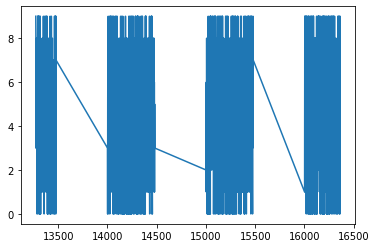

In [ ]:
period = df["Period"].values
period = np.mod(period,100000)
num = df["Num"].values
plt.plot(period,num)
plt.show()


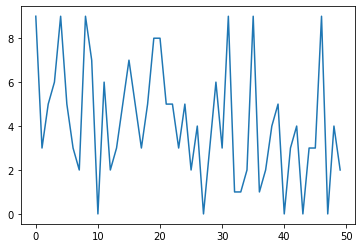

In [9]:
data = df['Num'].values
plt.plot(data[:50])
plt.show()

In [67]:
np.random.seed(7)
data = df['Num'].values
data = data[::-1]
data = np.reshape(data,(data.shape[0],1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test),dataset.shape)

4326 764 (5090, 1)


In [120]:
np.random.seed(7)
data = df['Num'].values
data = data.astype("float32")
data = data.reshape((-1,1))
data = data[::-1]
dataset = data/10
np.unique(dataset)
split = int(0.85*len(dataset))
train = dataset[:split,:]
test = dataset[split:,:]
print(len(train),len(test),dataset.shape)

4326 764 (5090, 1)


In [121]:
look_back = 10
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)

In [122]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [123]:
reg = L1L2(l1=0.01, l2=0.01)
model = Sequential()
model.add(LSTM(200, input_shape=(1, look_back),return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(200,return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = False,bias_regularizer=reg,activation="relu"))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
model1 = Sequential()
model1.add(LSTM(200,input_shape = (1, look_back), return_sequences = True,activation="relu"))
model1.add(Dropout(0.4))
model1.add(LSTM(100,return_sequences = True,activation="relu"))
model1.add(Dropout(0.35))
model1.add(LSTM(100,return_sequences = False,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(loss="mean_squared_error", optimizer="adam")

In [124]:
model.fit(train_x,train_y,epochs = 450,verbose=2,batch_size=1024, shuffle=False)

Epoch 1/450
5/5 - 0s - loss: 11.2595
Epoch 2/450
5/5 - 0s - loss: 11.1691
Epoch 3/450
5/5 - 0s - loss: 11.0769
Epoch 4/450
5/5 - 0s - loss: 10.9823
Epoch 5/450
5/5 - 0s - loss: 10.8822
Epoch 6/450
5/5 - 0s - loss: 10.7689
Epoch 7/450
5/5 - 0s - loss: 10.6327
Epoch 8/450
5/5 - 0s - loss: 10.5219
Epoch 9/450
5/5 - 0s - loss: 10.4372
Epoch 10/450
5/5 - 0s - loss: 10.3549
Epoch 11/450
5/5 - 0s - loss: 10.2761
Epoch 12/450
5/5 - 0s - loss: 10.1922
Epoch 13/450
5/5 - 0s - loss: 10.1140
Epoch 14/450
5/5 - 0s - loss: 10.0336
Epoch 15/450
5/5 - 0s - loss: 9.9553
Epoch 16/450
5/5 - 0s - loss: 9.8774
Epoch 17/450
5/5 - 0s - loss: 9.7998
Epoch 18/450
5/5 - 0s - loss: 9.7222
Epoch 19/450
5/5 - 0s - loss: 9.6461
Epoch 20/450
5/5 - 0s - loss: 9.5703
Epoch 21/450
5/5 - 0s - loss: 9.4939
Epoch 22/450
5/5 - 0s - loss: 9.4193
Epoch 23/450
5/5 - 0s - loss: 9.3433
Epoch 24/450
5/5 - 0s - loss: 9.2686
Epoch 25/450
5/5 - 0s - loss: 9.1946
Epoch 26/450
5/5 - 0s - loss: 9.1210
Epoch 27/450
5/5 - 0s - loss: 9.0

In [125]:
trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

In [126]:
len(np.unique(testPredict))

753

In [127]:
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict.shape

(4315, 1)

In [128]:
import math
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.57 RMSE
Test Score: 2.55 RMSE


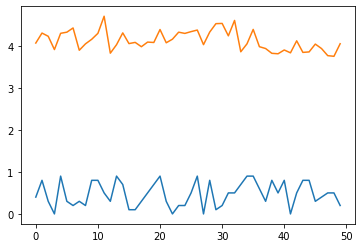

<Figure size 1440x720 with 0 Axes>

In [50]:
train_plot = [(i,j) for i,j in zip(train_y[:50],trainPredict[:50])]

plt.plot(train_plot)
plt.figure(figsize=(20,10))
plt.show()

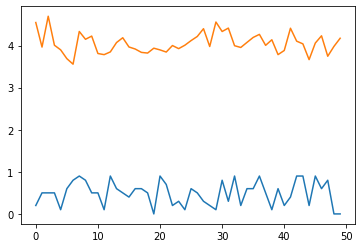

In [51]:
train_plot = [(i,j) for i,j in zip(test_y[:50],testPredict[:50])]

plt.plot(train_plot)
plt.show()

In [ ]:
test_x.shape

(369, 1, 10)

In [ ]:
val_x = [4,6,3,8,2]
val_x = val_x[::-1]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,5))

In [ ]:
val = np.squeeze(np.round(model.predict(val_x)*10))
print("red" if val%2==0 else "green")

green


In [ ]:
model.predict(val_x)

array([[0.47765648]], dtype=float32)

In [ ]:
val_x = [9,4,9,9,4,1,7,7,4,2]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,10))

In [49]:
np.unique(train)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])